In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
from pathlib import Path
dir = os.path.realpath('..')
# `cwd`: current directory is straightforward
# cwd = Path.cwd()
# datfile = r'calibration_data/RampTest_2022-01-13_202229.csv'
# datfile = r'calibration_data/StepsTest_2022-01-13_202828.csv'
datfile = r'calibration_data/StepsTest_2022-01-13_202350.csv'
fname = os.path.join(dir, datfile)
df = pd.read_csv(fname)

In [3]:
df['raw esc'] = df['ESC signal (µs)'].copy()
df['ESC signal (µs)'] = df['ESC signal (µs)'].apply(lambda x : (x-1000)/1000)

df['SpeedPWMfit'] = 2257.7 + 9390.9*df['ESC signal (µs)']
df['ThrustSpeedfit'] = (0.00000005650559524424)*(df['Motor Optical Speed (RPM)'].apply(lambda x: np.power(x,2)))
df['TorqueSpeedfit'] = (0.00000000088721737836)*(df['Motor Optical Speed (RPM)'].apply(lambda x: np.power(x,2)))

•	RPM vs. PWM curve
•	Thrust vs. PWM curve
•	Efficiency vs. RPM
•	Thrust vs. RPM
•	Torque vs. RPM

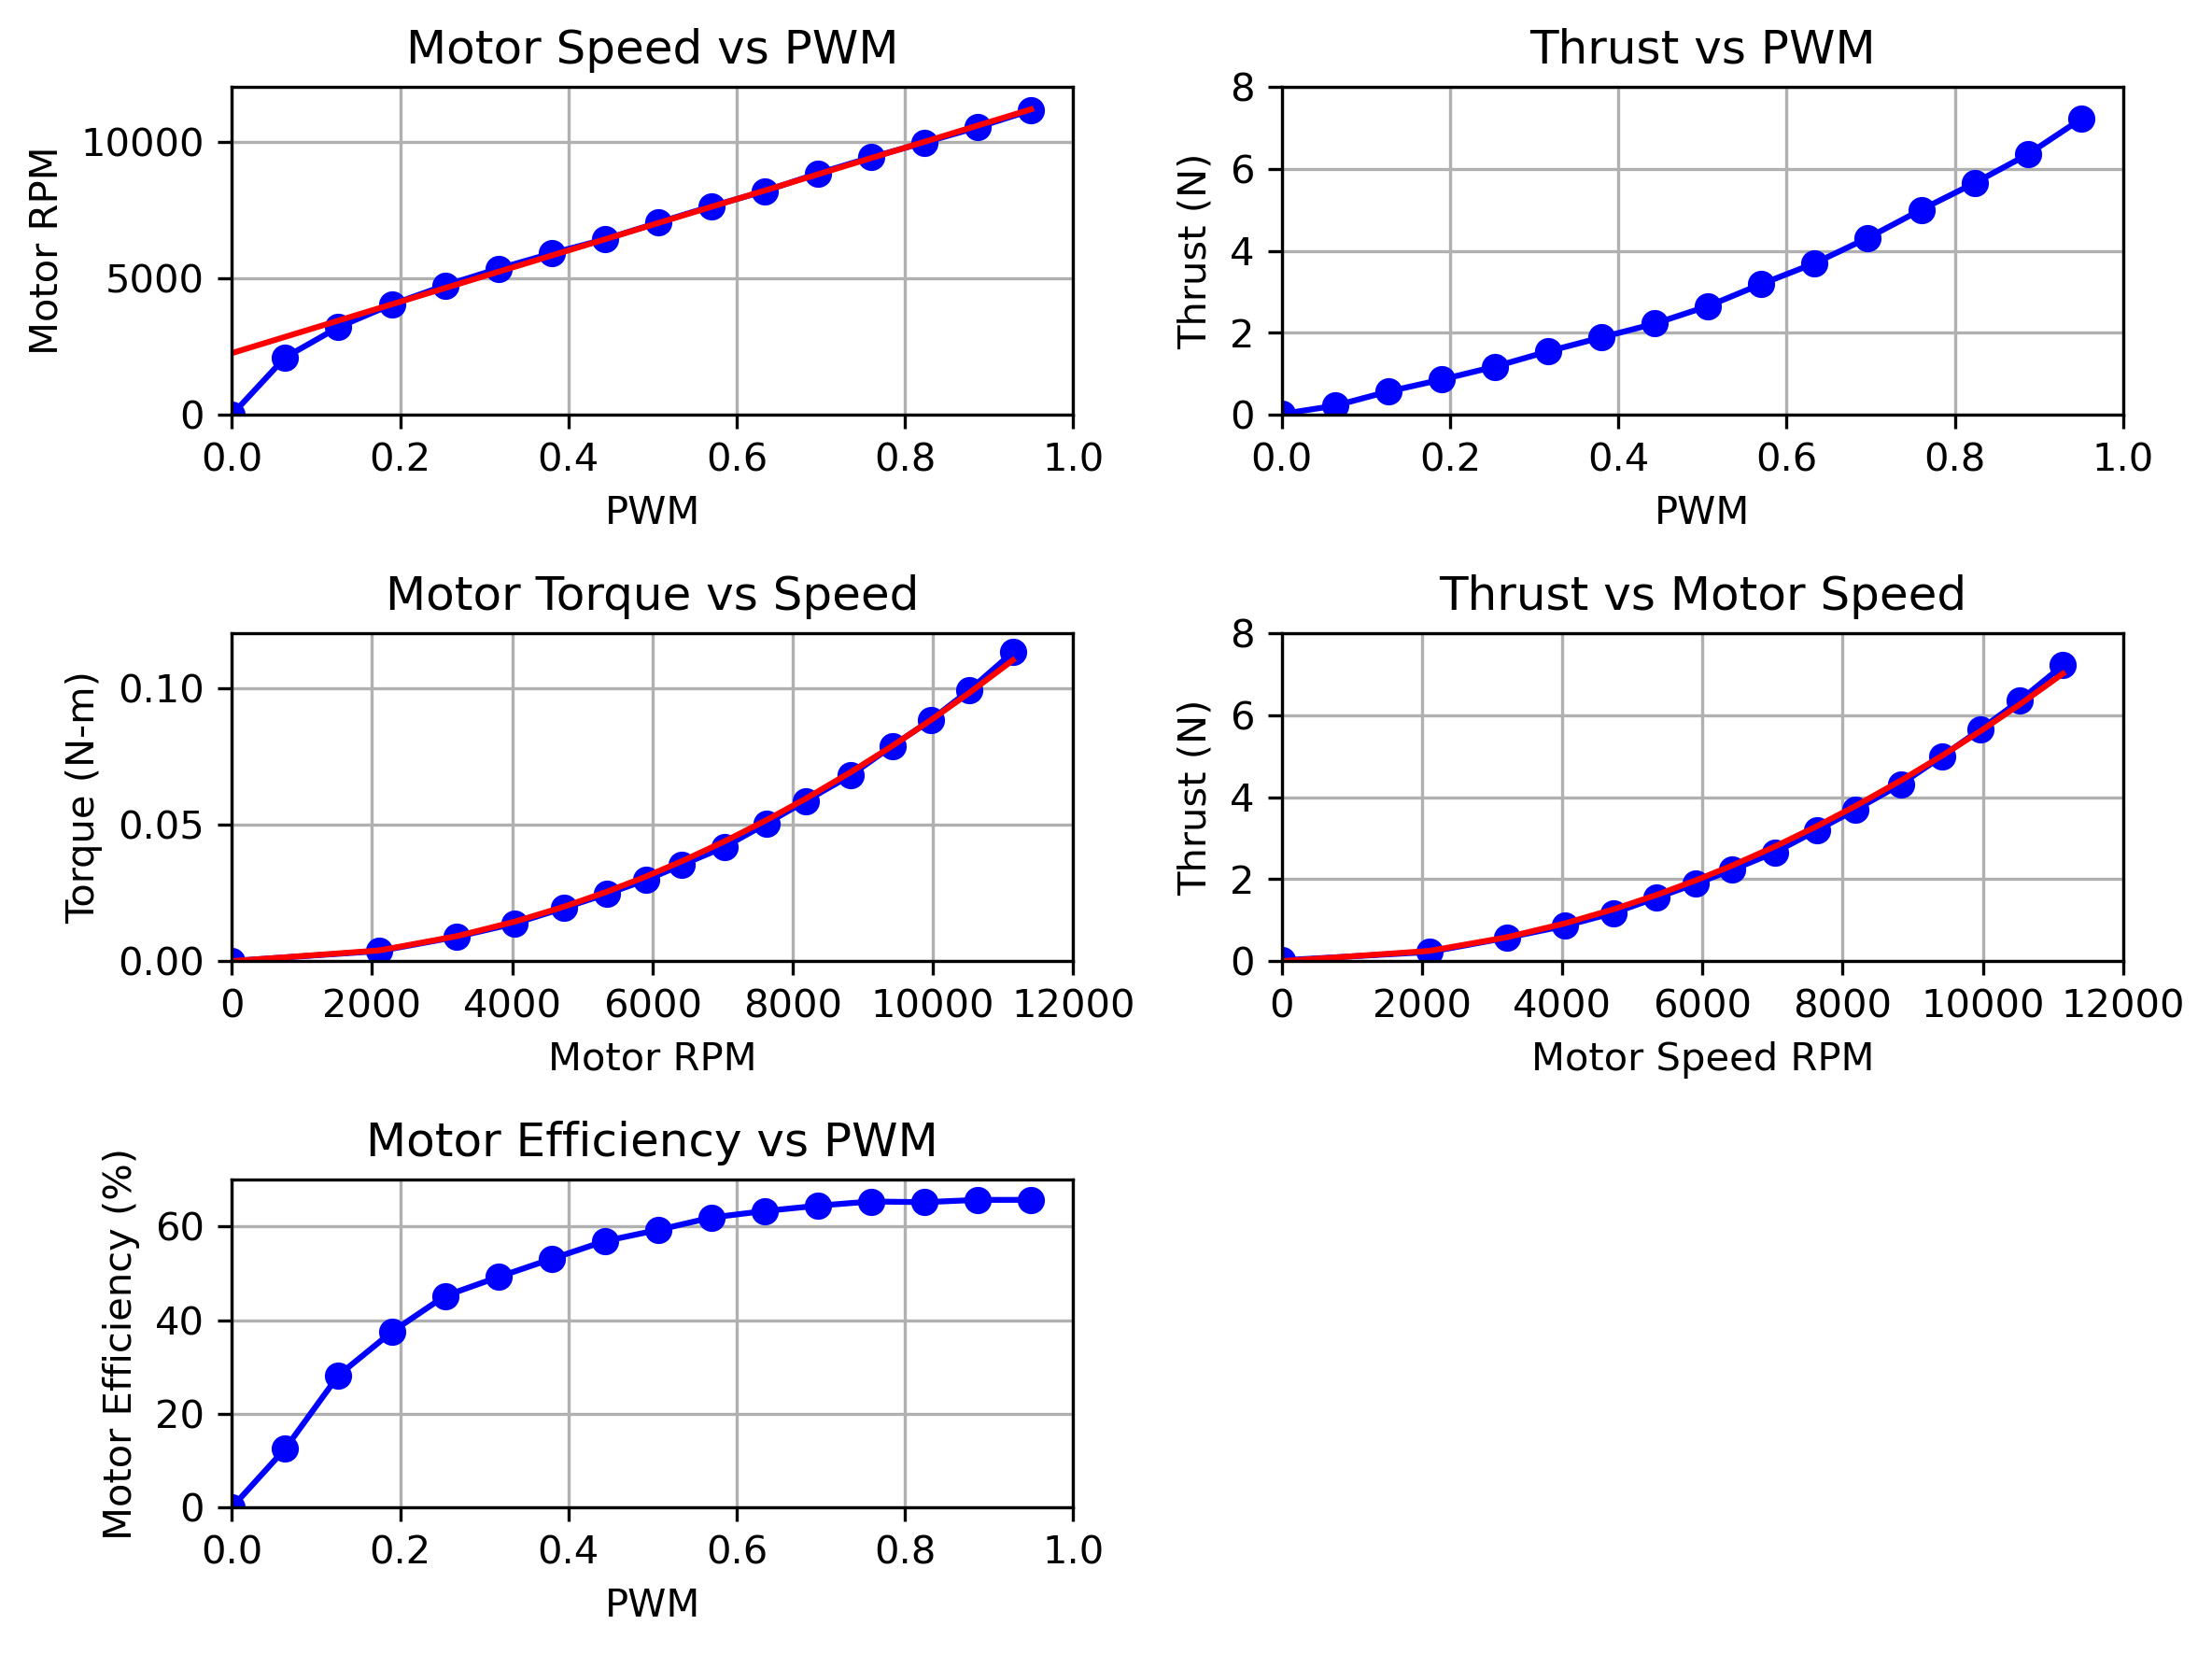

In [4]:
plt.figure(figsize=(8, 6), dpi=300)
plt.subplot(3,2,1)
plt.plot(df['ESC signal (µs)'],df['Motor Optical Speed (RPM)'],'bo-')
plt.plot(df['ESC signal (µs)'],df['SpeedPWMfit'],'r-')
plt.title('Motor RPM vs PWM')
plt.xlabel('PWM')
plt.ylabel('Motor RPM')
plt.grid()
plt.xlim([0,1])
plt.ylim([0,12000])

plt.subplot(3,2,2)
plt.plot(df['ESC signal (µs)'],df['Thrust (N)'],'bo-')
plt.title('Thrust vs PWM')
plt.ylabel('Thrust (N)')
plt.xlabel('PWM')
plt.grid()
plt.xlim([0,1])
plt.ylim([0,8])

plt.subplot(3,2,3)
plt.plot(df['Motor Optical Speed (RPM)'], df['Torque (N·m)'],'bo-')
plt.plot(df['Motor Optical Speed (RPM)'], df['TorqueSpeedfit'],'r-')
plt.title('Torque vs Motor RPM')
plt.ylabel('Torque (N-m)')
plt.xlabel('Motor RPM')
plt.grid()
plt.xlim([0,12000])
plt.ylim([0,0.12])

plt.subplot(3,2,4)
plt.plot(df['Motor Optical Speed (RPM)'],df['Thrust (N)'],'bo-')
plt.plot(df['Motor Optical Speed (RPM)'],df['ThrustSpeedfit'],'r-')
plt.title('Thrust vs Motor RPM')
plt.ylabel('Thrust (N)')
plt.xlabel('Motor RPM')
plt.grid()
plt.xlim([0,12000])
plt.ylim([0,8])

plt.subplot(3,2,5)
plt.plot(df['ESC signal (µs)'],df['Motor Efficiency (%)'],'bo-')
plt.title('Motor Efficiency vs PWM')
plt.ylabel('Motor Efficiency (%)')
plt.xlabel('PWM')
plt.grid()
plt.xlim([0,1])
plt.ylim([0,70])

plt.tight_layout()
